In [1]:
import sys
import os

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)

# Import the script
import utils

In [2]:
import numpy as np
import bilby
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyana/Documents/PhDThesisPlots/matplotlibrc')

In [4]:
mpl.rc('xtick', labelsize = 18) 
mpl.rc('ytick', labelsize = 18)

In [5]:
path_to_plots = 'plots'

In [6]:
my_color = '#2f4f4f'
my_bin_num = 50

In [7]:
columns_lbs = ['H0', 'Om0', 'alpha', 'beta', 'mmin', 'mmax', 'delta_m', 'mu_g', 'sigma_g', 'lambda_peak',
               'gamma', 'kappa', 'zp', 'R0']
lbs = [ '$H_0$',#\n [km s$^{-1}$ Mpc$^{-1}$]', 
        '$\\Omega_{\\rm m,0}$', 
        '$\\alpha$', 
        '$\\beta$', 
        '$m_{\\rm min}$',#\n [$M_{\odot}$]', 
        '$m_{\\rm max}$',#\n [$M_{\odot}$]', 
        '$\\delta m$',#\n [$M_{\odot}$]', 
        '$\\mu_{\\rm g}$',#\n [$M_{\odot}$]', 
        '$\\sigma_{\\rm g}$',#\n [$M_{\odot}$]', 
        '$\\lambda_{\\rm peak}$', 
        '$\gamma$', 
        '$\kappa$', 
        '$z_{\\rm p}$', 
        '$R_0$']#\n [Gpc$^{-3}$yr$^{-1}$]']

lbs_dict = {'H0':'$H_0$ [km s$^{-1}$ Mpc$^{-1}$]', 
        'Om0':'$\\Omega_{\\rm m,0}$', 
        'alpha':'$\\alpha$', 
        'beta':'$\\beta$', 
        'mmin':'$m_{\\rm min}$ [$M_{\odot}$]', 
        'mmax':'$m_{\\rm max}$ [$M_{\odot}$]', 
        'delta_m':'$\\delta m$ [$M_{\odot}$]', 
        'mu_g':'$\\mu_{\\rm g}$ [$M_{\odot}$]', 
        'sigma_g':'$\\sigma_{\\rm g}$ [$M_{\odot}$]', 
        'lambda_peak':'$\\lambda_{\\rm peak}$', 
        'gamma':'$\gamma$', 
        'kappa':'$\kappa$', 
        'zp':'$z_{\\rm p}$', 
        'R0':'$R_0$ [Gpc$^{-3}$yr$^{-1}$]'}

In [8]:
injected_values_vanilla = {'H0':67.8, 
                   'Om0':0.3, 
                   'alpha':3.4, 
                   'beta':0.8, 
                   'mmin':5, 
                   'mmax':100, 
                   'delta_m':4.8, 
                   'mu_g':35, 
                   'sigma_g':3.9, 
                   'lambda_peak':0.04, 
                   'gamma':2.7, 
                   'kappa':2.9, 
                   'zp':1.9,
                   'R0':20}

In [9]:
# load dictionary of events
case1_dictionary_path = 'data/case1_events_dictionary.pkl'
with open(case1_dictionary_path, 'rb') as f:
    case1_dict = pickle.load(f)
    
# load dictionary of labels 
case1_lbl_dictionary_path = 'data/case1_events_lbl_dictionary.pkl'
with open(case1_lbl_dictionary_path, 'rb') as f:
    case1_lbl_dict = pickle.load(f)

In [10]:
# one parameter histogram
def param_histogram(param, event_list, lbl_list, fig_label = ' ', leg_title=None, leg_ncols=2, yshift=1.125, save_fig_path = False):
    
    alpha_values = np.linspace(0.35, 1.0, len(event_list))
    
    fig, ax = plt.subplots(1,1)
    for j, (name, event_path) in enumerate(event_list.items()):
        data = bilby.core.result.read_in_result(event_path)
        data_posteriors = data.posterior[columns_lbs]
        
        sns.histplot(data_posteriors[param], bins = my_bin_num, fill = False, stat = 'density',
                alpha = alpha_values[j], element = 'step', color = my_color,
                linewidth = 3.0, label = lbl_list[name])
        plt.axvline(injected_values_vanilla[param], color = 'black', linewidth = 1.5, linestyle = 'dashed')
    
    plt.yscale('log')
    plt.xlabel('%s' %lbs_dict[param], fontsize = 24)
    plt.ylabel('Probability', fontsize = 24)
   
    fig.legend(title=leg_title, title_fontsize=24,
               loc = 'center', ncol = leg_ncols, bbox_to_anchor = (0.55, yshift), fontsize = 24, frameon=False)

    
    fig.tight_layout()
    if save_fig_path:
        plt.savefig(path_to_plots + '/' + 'posteriors_%s%s.pdf' %(fig_label, param), bbox_inches='tight')
    plt.show()
    plt.close()

### Vary number and sample of injections for $p_{\rm det}$ calculation

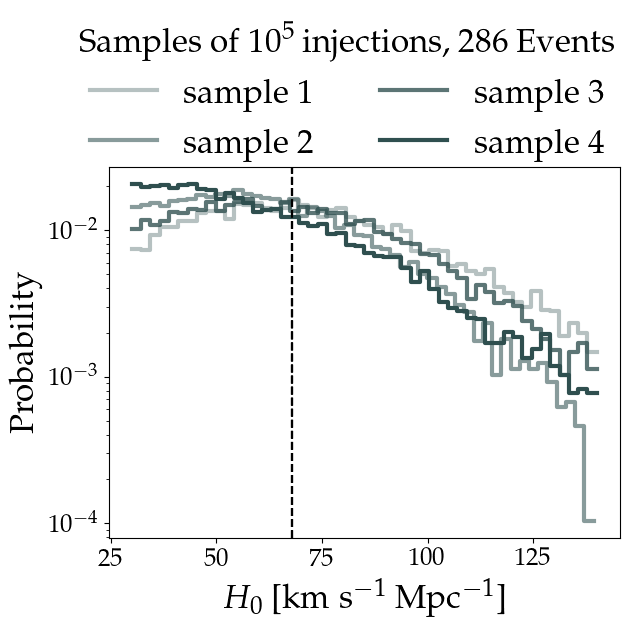

In [11]:
# vary sample of 1e5 injections
param_histogram('H0', case1_dict['case1_inj_sample'], case1_lbl_dict['case1_inj_sample'], 
                'case1_inj_sample', 'Samples of $10^5$ injections, 286 Events', 2, 1.125, True)

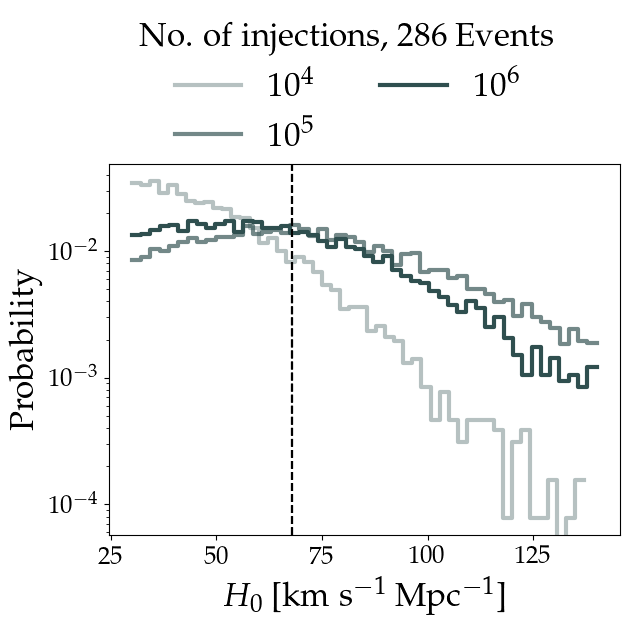

In [12]:
# vary number of injections
param_histogram('H0', case1_dict['case1_inj_number'], case1_lbl_dict['case1_inj_number'], 
                'case1_inj_number', 'No. of injections, 286 Events', 2, 1.125, True)

### Vary number and sample of events

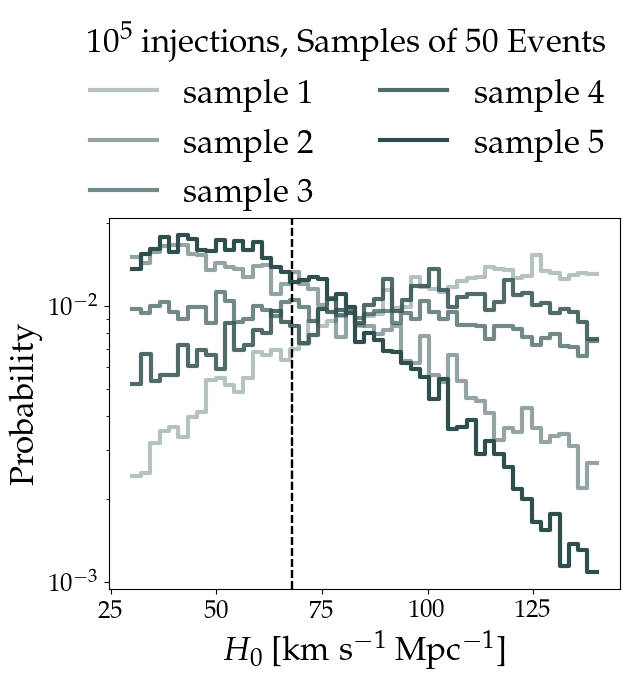

In [13]:
# vary events sample
param_histogram('H0', case1_dict['case1_events_sample'], case1_lbl_dict['case1_events_sample'], 
                'case1_events_sample', '$10^5$ injections, Samples of 50 Events', 2, 1.18, True)

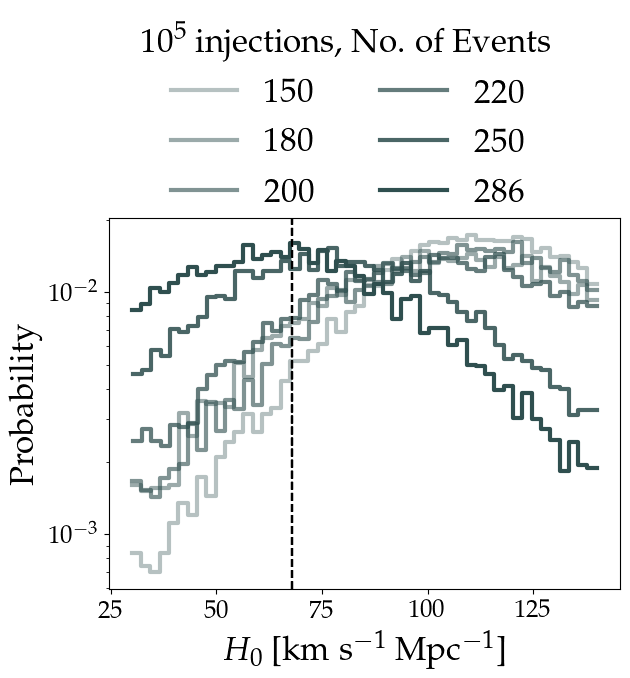

In [14]:
# vary number of events
param_histogram('H0', case1_dict['case1_events_number'], case1_lbl_dict['case1_events_number'], 
                'case1_events_number', '$10^5$ injections, No. of Events', 2, 1.18, True)

### Full histograms

In [15]:
# Full histogram:
def plot_posteriors(event_list, lbl_list, fig_label = ' ', leg_title=None, legend_ncols = 1, save_fig_path = False):
    
    alpha_values = np.linspace(0.35, 1.0, len(event_list))
    
    n_rows = 5
    n_cols = 3
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20), sharex = False)


    for i, param in enumerate(columns_lbs):
        
        for j, (name, event_path) in enumerate(event_list.items()):
            data = bilby.core.result.read_in_result(event_path)
            data_posteriors = data.posterior[columns_lbs]
            
            ax = axs[i//n_cols, i%n_cols]
            sns.histplot(data_posteriors[param], bins = my_bin_num, fill = False, stat = 'density',
                    alpha = alpha_values[j], element = 'step', color = my_color,
                    linewidth = 2.0, label = lbl_list[name], ax = ax)
            
            ax.axvline(injected_values_vanilla[param], color = 'black', linewidth = 1., linestyle = 'dashed')

        axs[i//n_cols, i%n_cols].set_yscale('log')
        axs[i//n_cols, i%n_cols].set_xlabel('%s' %lbs_dict[param], fontsize = 24)
        axs[i//n_cols, 0].set_ylabel('Probability', fontsize = 24)
        axs[i//n_cols, 1].set_ylabel('')
        axs[i//n_cols, 2].set_ylabel('')

    axs[n_rows - 1, n_cols - 1].axis('off')

    axs[n_rows - 1, n_cols - 2].legend(title=leg_title, title_fontsize=24,
                                       loc = 'center', ncol = legend_ncols, 
                                       bbox_to_anchor = (1.85, 0.5), fontsize = 24,
                                       frameon = False)

    plt.subplots_adjust( 
                    wspace=0.3, 
                    hspace=0.3)
    if save_fig_path:
        plt.savefig(path_to_plots + '/' + 'posteriors_%s.pdf' %fig_label, bbox_inches='tight')
    plt.show()
    plt.close()

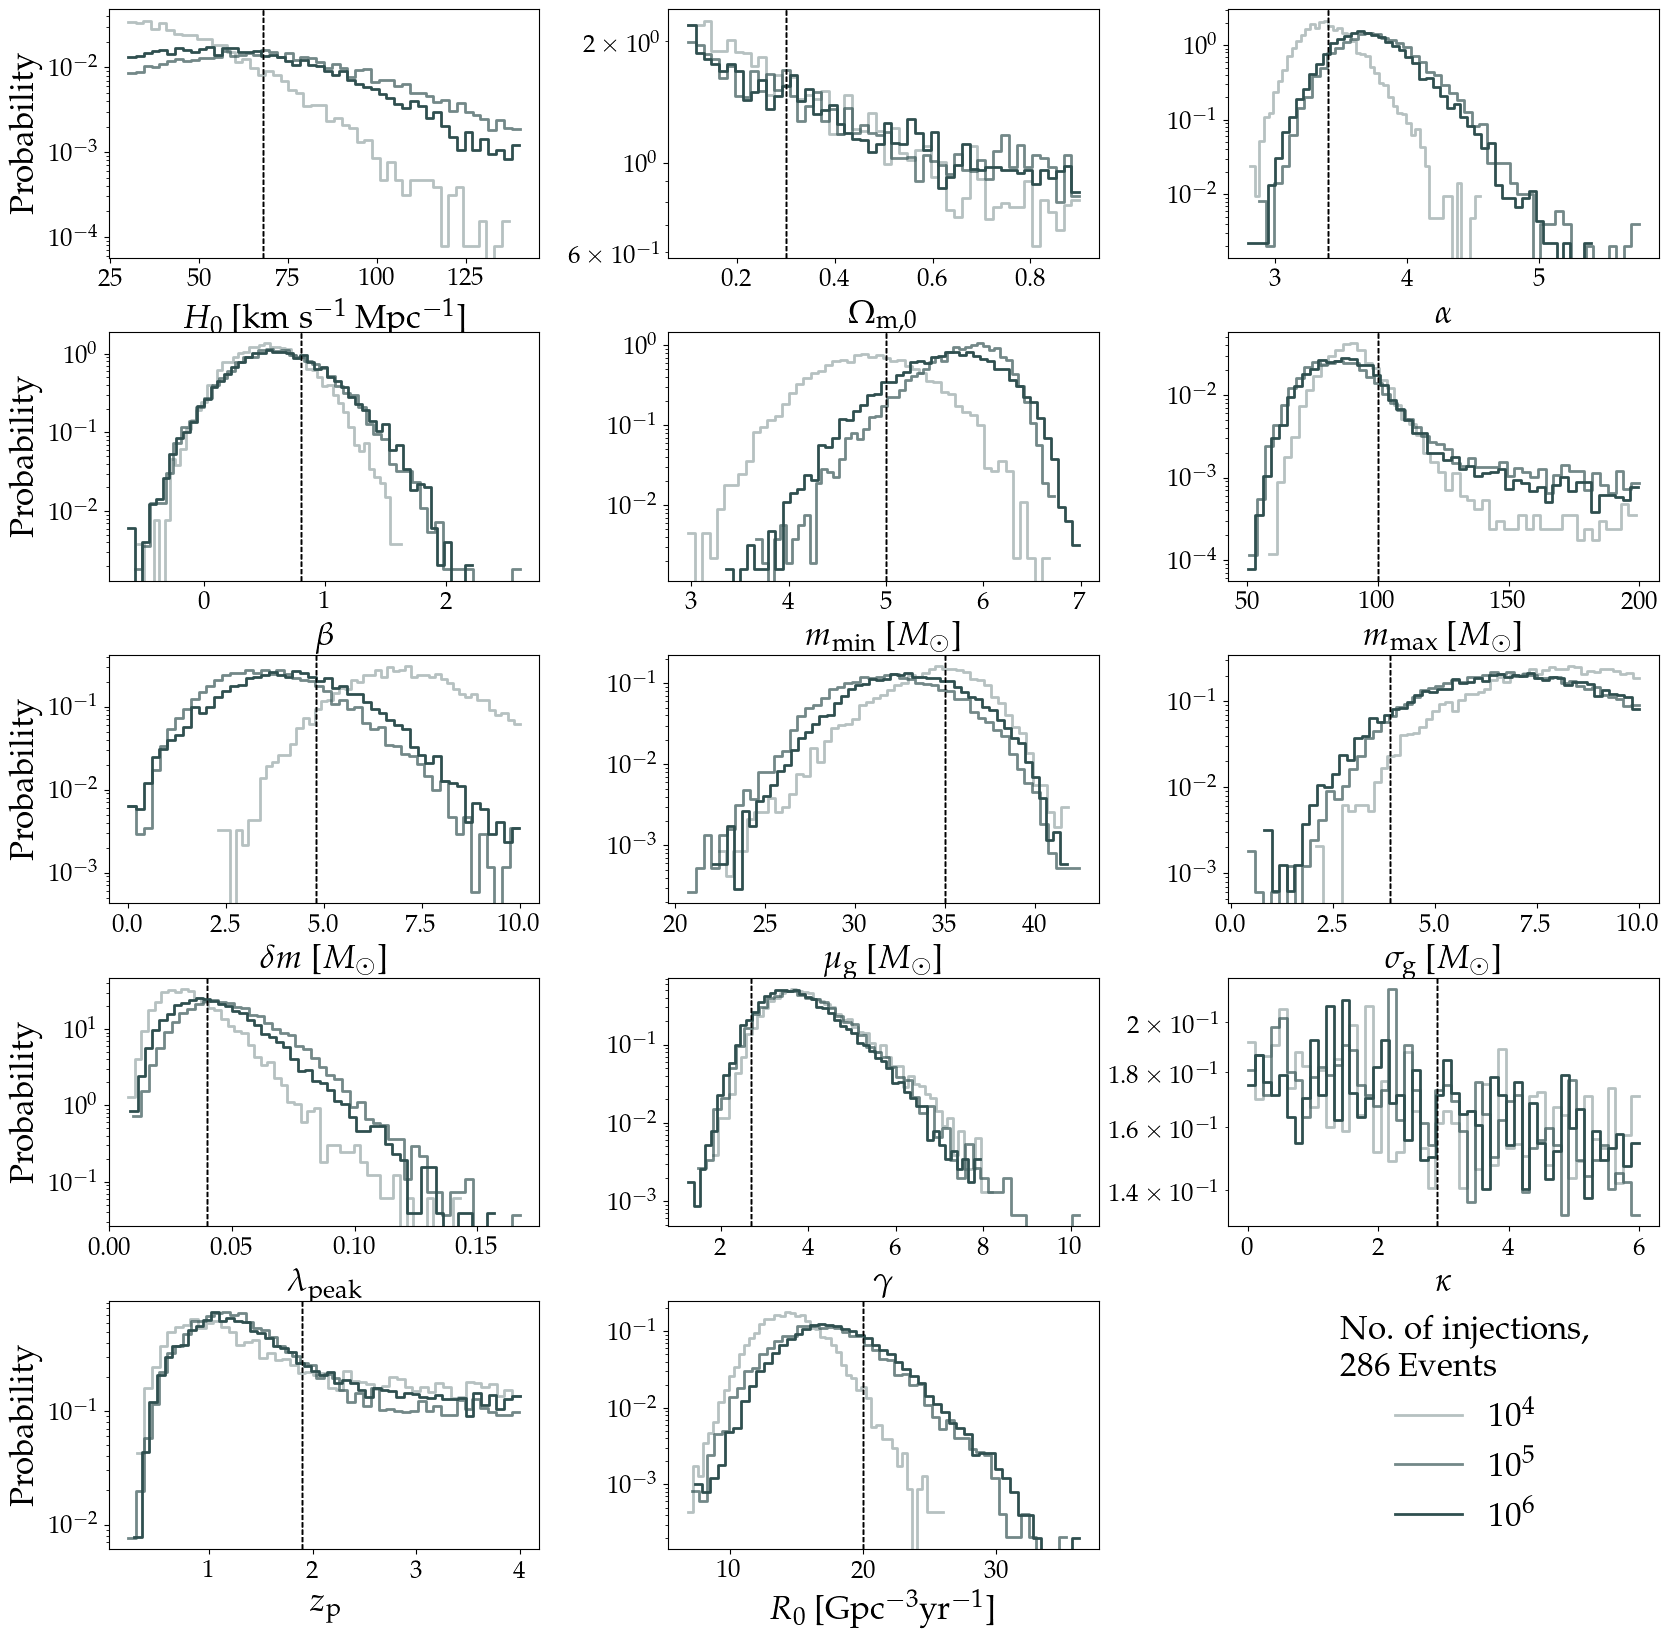

In [16]:
# injection number
plot_posteriors(case1_dict['case1_inj_number'], case1_lbl_dict['case1_inj_number'], 
                'case1_hist_full_inj_number', 'No. of injections, \n 286 Events', 1,  True)

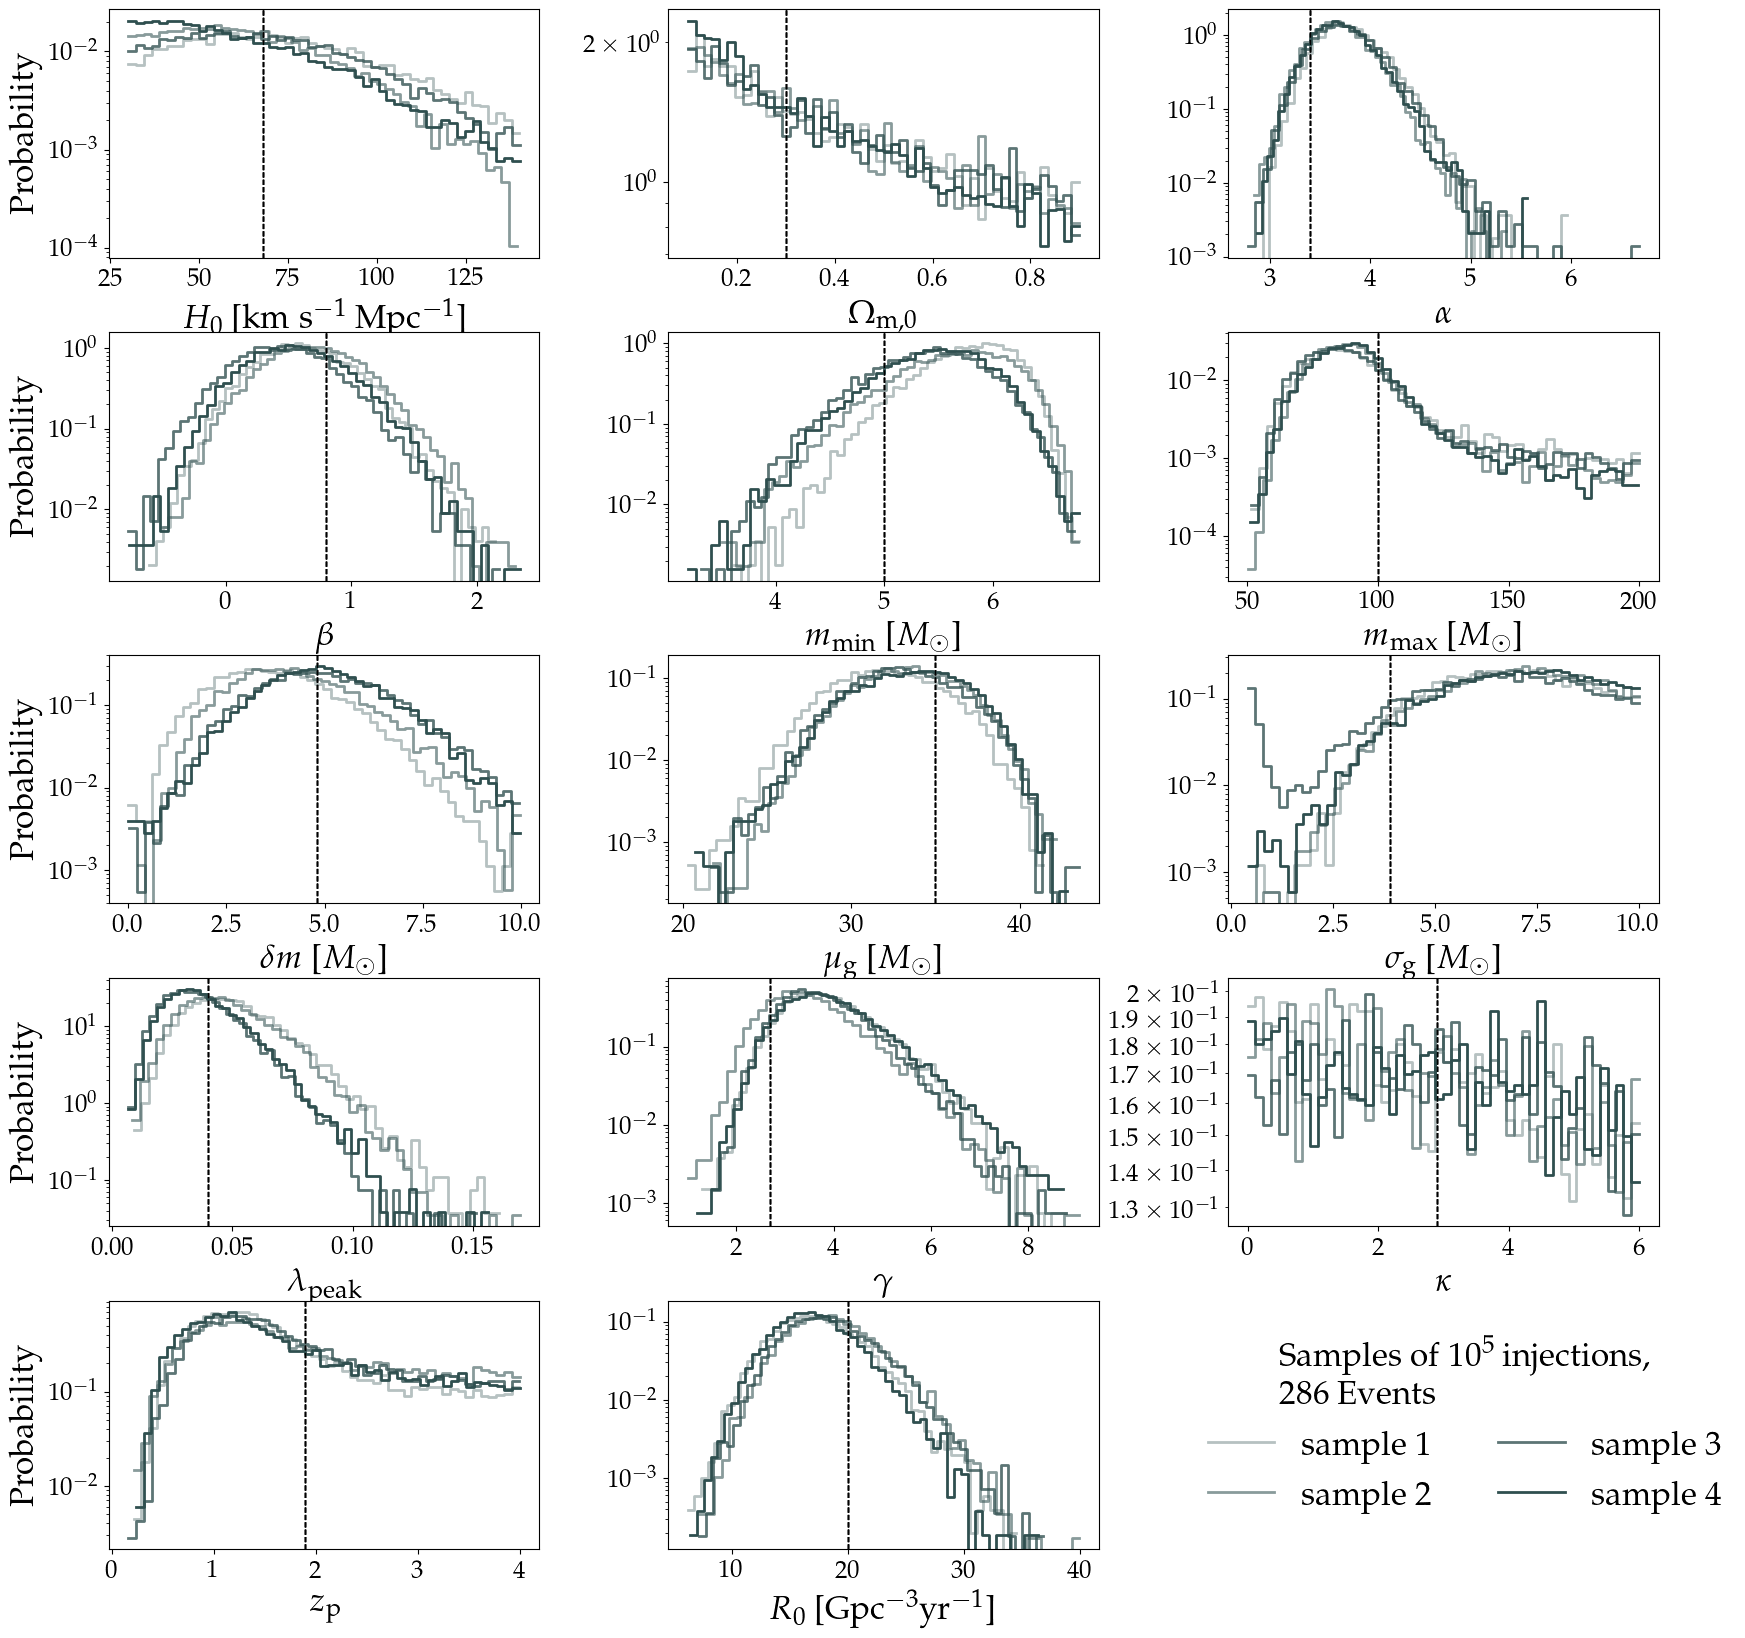

In [17]:
# injection sample
plot_posteriors(case1_dict['case1_inj_sample'], case1_lbl_dict['case1_inj_sample'], 
                'case1_hist_full_inj_sample', 'Samples of $10^5$ injections,\n 286 Events', 2,  True)

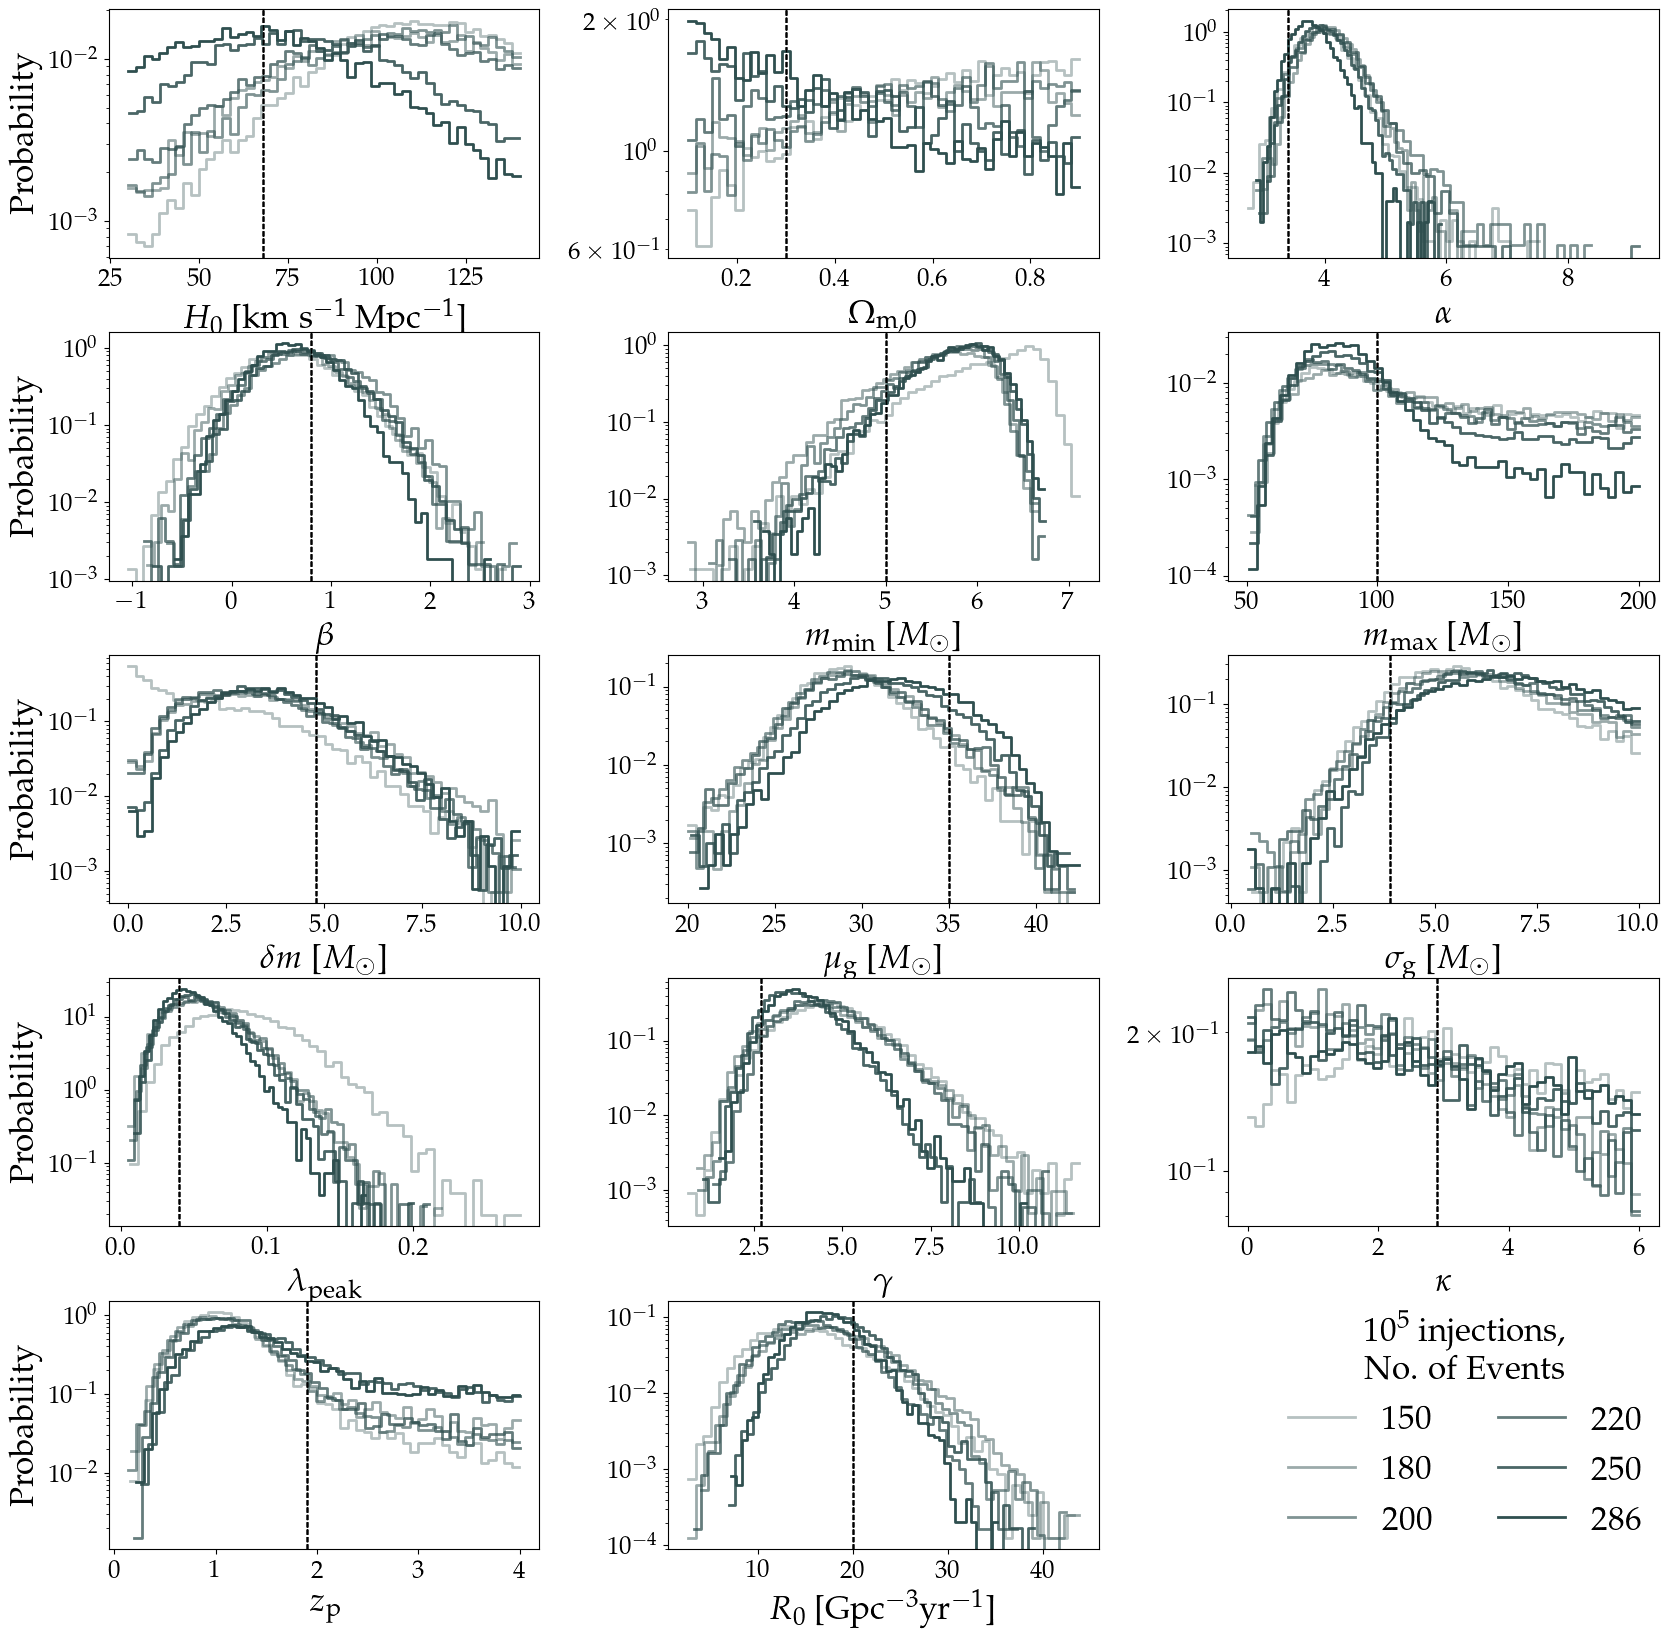

In [18]:
# event number
plot_posteriors(case1_dict['case1_events_number'], case1_lbl_dict['case1_events_number'], 
                'case1_hist_full_events_number', '$10^5$ injections,\n No. of Events', 2,  True)

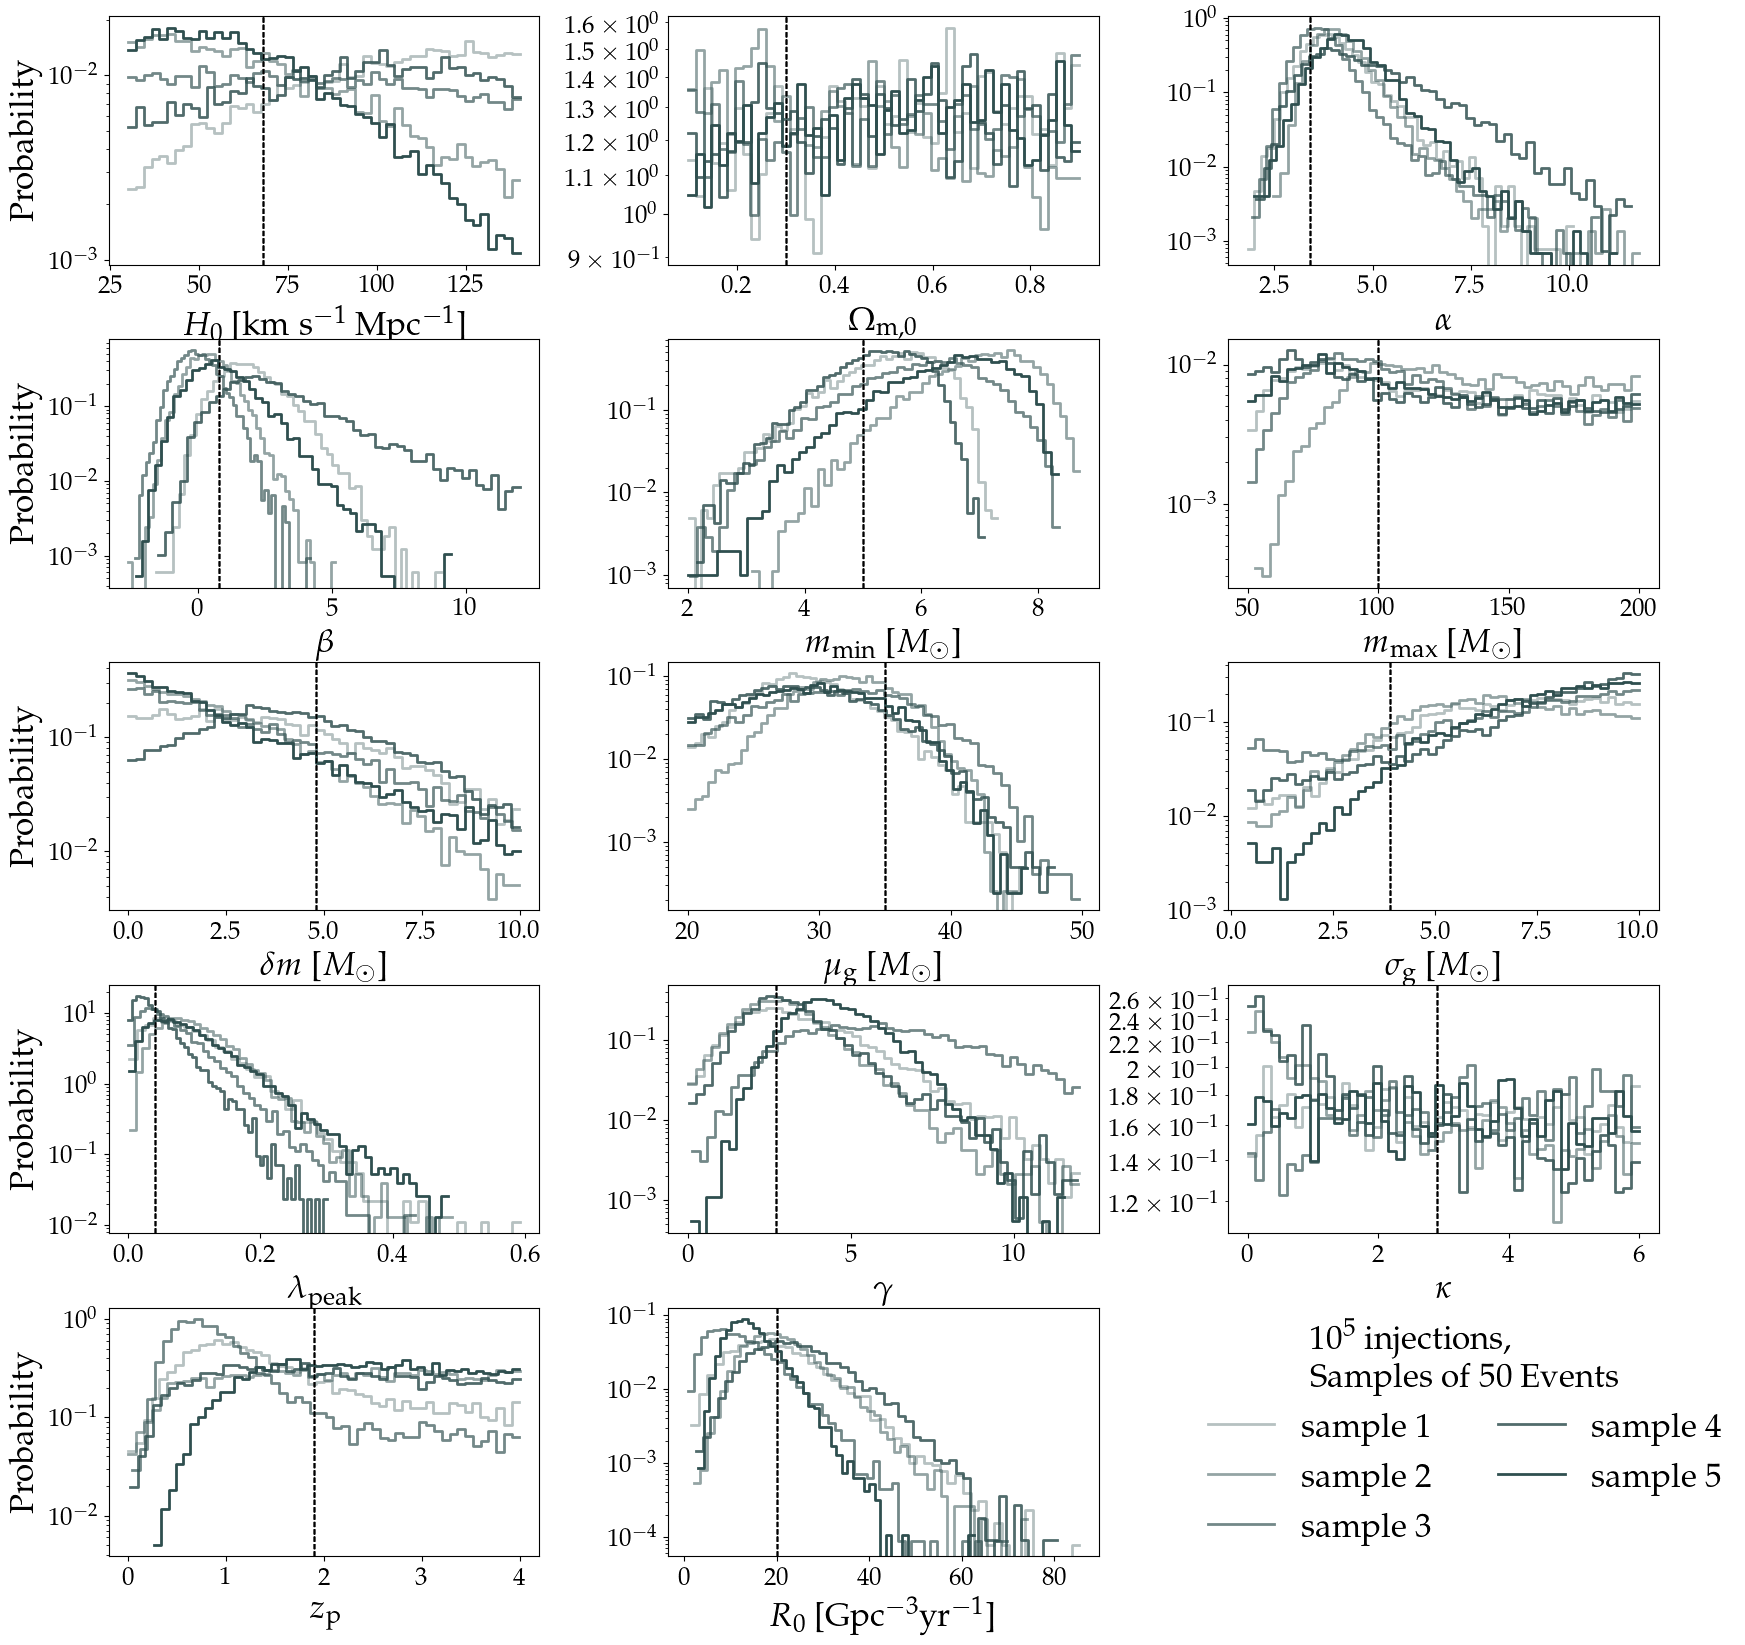

In [19]:
# events samples
plot_posteriors(case1_dict['case1_events_sample'], case1_lbl_dict['case1_events_sample'], 
                'case1_hist_full_events_sample', '$10^5$ injections,\n Samples of 50 Events', 2,  True)